In [1]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
Sdata=pd.read_csv("Salary_Data.csv")
Sdata.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
Sdata.tail()

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


# EDA & Visualisation  

In [4]:
Sdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
Sdata.shape

(30, 2)

In [6]:
Sdata.dtypes

YearsExperience    float64
Salary             float64
dtype: object

<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

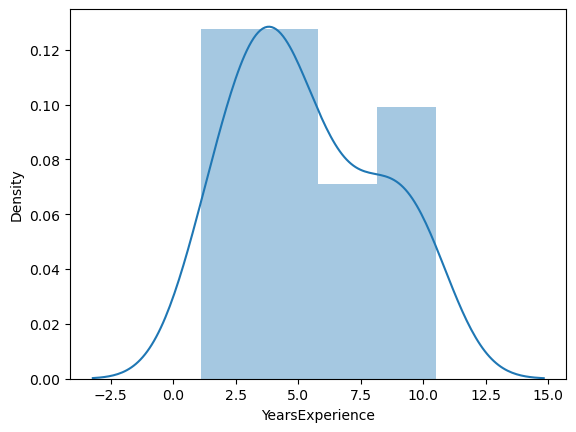

In [7]:
sns.distplot(Sdata['YearsExperience'])

<AxesSubplot:xlabel='Salary', ylabel='Density'>

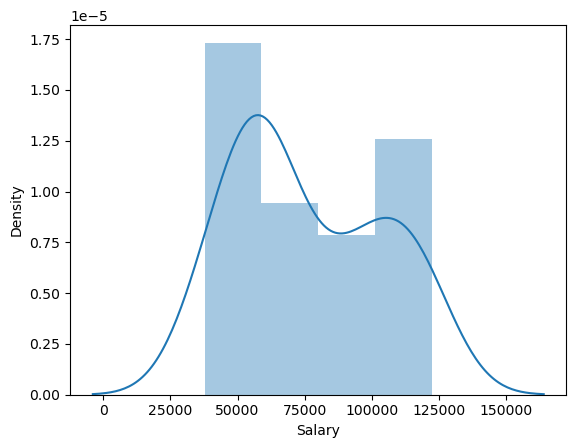

In [8]:
sns.distplot(Sdata['Salary'])

# Rename the columns

In [11]:
Sdata_ren=Sdata.rename({"YearsExperience":"Years_experience", "Salary":"Salary_hike"}, axis=1)

In [12]:
Sdata_ren.head(2)

,Years_experience,Salary_hike
0,1.1,39343.0
1,1.3,46205.0


In [13]:
Sdata_cop=Sdata_ren.copy()

In [14]:
Sdata_cop.head()

,Years_experience,Salary_hike
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


# Outlier Detection

<AxesSubplot:>

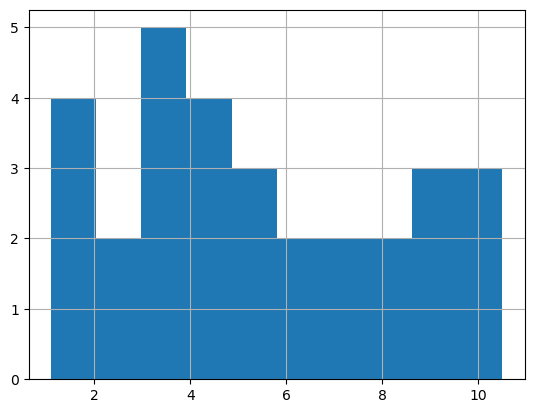

In [15]:
Sdata_ren['Years_experience'].hist()

<AxesSubplot:>

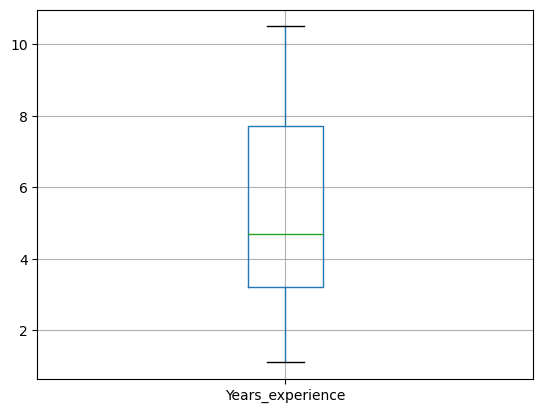

In [16]:
Sdata_ren.boxplot(column='Years_experience')

In [17]:
Sdata_ren['Years_experience'].describe()

count    30.000000
mean      5.313333
std       2.837888
min       1.100000
25%       3.200000
50%       4.700000
75%       7.700000
max      10.500000
Name: Years_experience, dtype: float64

<AxesSubplot:>

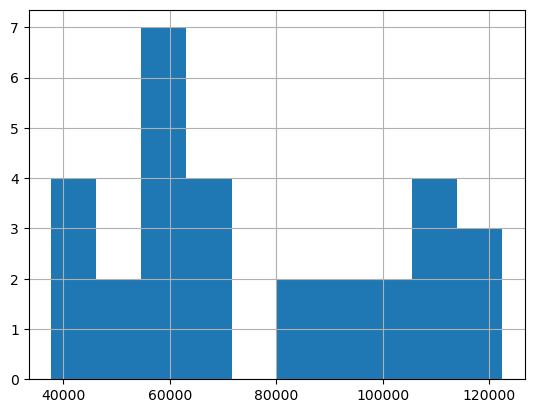

In [18]:
Sdata_ren['Salary_hike'].hist()

<AxesSubplot:>

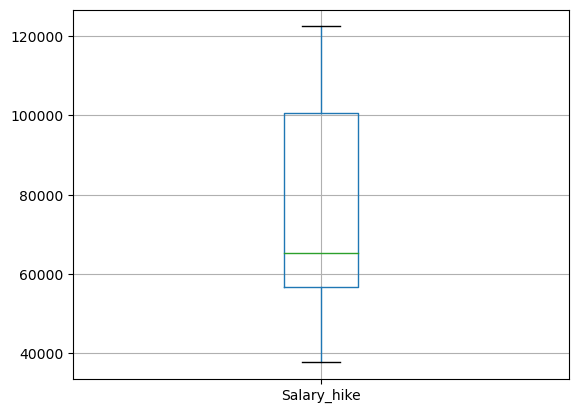

In [19]:
Sdata_ren.boxplot(column='Salary_hike')

In [20]:
Sdata_ren['Salary_hike'].describe()

count        30.000000
mean      76003.000000
std       27414.429785
min       37731.000000
25%       56720.750000
50%       65237.000000
75%      100544.750000
max      122391.000000
Name: Salary_hike, dtype: float64

# Missing Values Imputation

In [21]:
Sdata_ren.isnull().head()

,Years_experience,Salary_hike
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False


<AxesSubplot:>

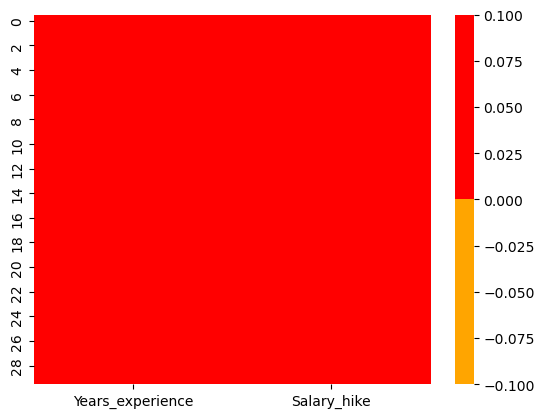

In [22]:
#Heatmap
cols=Sdata_ren.columns
colors=['orange', 'red']
sns.heatmap(Sdata_ren[cols].isnull(), cmap=colors)

In [23]:
Sdata_ren[Sdata_ren.isnull().any(axis=1)].head()

,Years_experience,Salary_hike


# Correlation & Ploting the Dtata 

In [24]:
Sdata_ren.corr()

,Years_experience,Salary_hike
Years_experience,1.000000,0.978242
Salary_hike,0.978242,1.000000


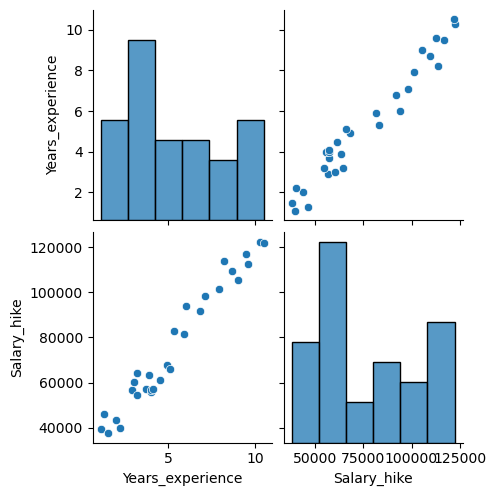

In [25]:
sns.pairplot(Sdata_ren)

<AxesSubplot:xlabel='Years_experience', ylabel='Salary_hike'>

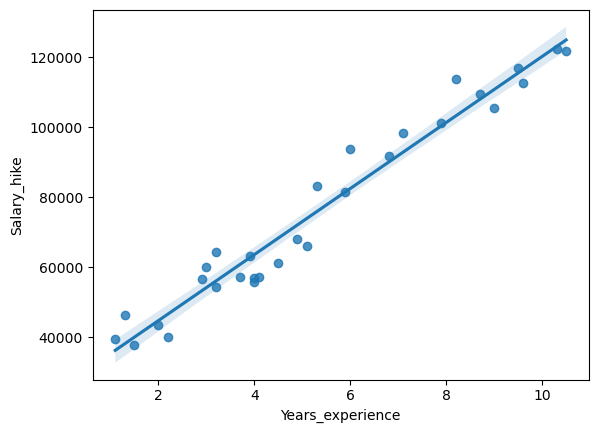

In [26]:
sns.regplot(x=Sdata_ren['Years_experience'], y=Sdata_ren['Salary_hike'])

# Create the Model

In [42]:
import statsmodels.formula.api as smf
Dmodel=smf.ols("Salary_hike~Years_experience", data=Sdata_ren).fit()

In [44]:
Dmodel

# Testing the model

In [39]:
Dmodel.params

Intercept           25792.200199
Years_experience     9449.962321
dtype: float64

In [45]:
Dmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Salary_hike   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Mon, 13 Feb 2023   Prob (F-statistic):           1.14e-20
Time:                        12:38:14   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
Years_experience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Transformations on the given created model 

In [46]:
#1.Log Transformation
Dmodel = smf.ols("Years_experience~np.log(Salary_hike)", data=Sdata_ren).fit()

In [47]:
Dmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Years_experience   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Mon, 13 Feb 2023   Prob (F-statistic):           7.03e-18
Time:                        12:43:35   Log-Likelihood:                -33.035
No. Observations:                  30   AIC:                             70.07
Df Residuals:                      28   BIC:                             72.87
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             -77.6961      4.241    -18.322      0.000     -86.383     -69.009
np.log(Salary_hike)     7.4288      0.379     19.585      0.000       6.652       8.206
==============================================================================
Omnibus:                        1.748   Durbin-Watson:                   1.348
Prob(Omnibus):                  0.417   Jarque-Bera (JB):                1.213
Skew:                          -0.227   Prob(JB):                        0.545
Kurtosis:                       2.126   Cond. No.                         347.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
Dmodel = smf.ols("np.log(Years_experience)~Salary_hike", data=Sdata_ren).fit()

In [49]:
Dmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     np.log(Years_experience)   R-squared:                       0.854
Model:                                  OLS   Adj. R-squared:                  0.849
Method:                       Least Squares   F-statistic:                     163.6
Date:                      Mon, 13 Feb 2023   Prob (F-statistic):           3.25e-13
Time:                              12:45:16   Log-Likelihood:                0.92814
No. Observations:                        30   AIC:                             2.144
Df Residuals:                            28   BIC:                             4.946
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.0942      0.133     -0.710      0.483      -0.366       0.178
Salary_hike  2.104e-05   1.64e-06     12.792      0.000    1.77e-05    2.44e-05
==============================================================================
Omnibus:                        7.529   Durbin-Watson:                   0.461
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                5.772
Skew:                          -0.923   Prob(JB):                       0.0558
Kurtosis:                       4.099   Cond. No.                     2.41e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [61]:
#2. Square root Transformation
Sdata_ren['sq_rt']=Sdata_ren.Salary_hike**2

In [62]:
Sdata_ren.head()

,Years_experience,Salary_hike,sq_rt,cb_rt
0,1.1,39343.0,1.547872e+09,6.089791e+13
1,1.3,46205.0,2.134902e+09,9.864315e+13
2,1.5,37731.0,1.423628e+09,5.371492e+13
3,2.0,43525.0,1.894426e+09,8.245488e+13
4,2.2,39891.0,1.591292e+09,6.347822e+13


In [63]:
Dmodel = smf.ols("np.log(Years_experience)~Salary_hike+sq_rt", data=Sdata_ren).fit()

In [64]:
Dmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     np.log(Years_experience)   R-squared:                       0.907
Model:                                  OLS   Adj. R-squared:                  0.901
Method:                       Least Squares   F-statistic:                     132.3
Date:                      Mon, 13 Feb 2023   Prob (F-statistic):           1.12e-14
Time:                              12:51:55   Log-Likelihood:                 7.7666
No. Observations:                        30   AIC:                            -9.533
Df Residuals:                            27   BIC:                            -5.330
Df Model:                                 2                                         
Covariance Type:                  nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -1.5369      0.381     -4.036      0.000      -2.318      -0.755
Salary_hike  6.153e-05   1.03e-05      5.951      0.000    4.03e-05    8.27e-05
sq_rt       -2.514e-10   6.37e-11     -3.949      0.001   -3.82e-10   -1.21e-10
==============================================================================
Omnibus:                        3.765   Durbin-Watson:                   1.047
Prob(Omnibus):                  0.152   Jarque-Bera (JB):                2.504
Skew:                          -0.687   Prob(JB):                        0.286
Kurtosis:                       3.340   Cond. No.                     8.31e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.31e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [65]:
Dmodel.tvalues, Dmodel.pvalues

(Intercept     -4.035664
 Salary_hike    5.950994
 sq_rt         -3.949025
 dtype: float64,
 Intercept      0.000403
 Salary_hike    0.000002
 sq_rt          0.000506
 dtype: float64)

In [66]:
Dmodel.rsquared, Dmodel.rsquared_adj

(0.9073830571480186, 0.9005225428626866)